## Morning practical 2 day 6

Here you'll be burying the traumatic experience of training your own neural networks by doing it _much_ more easily using Keras. We'll work on the same MNIST dataset as before. First run the two code cells below.

In [2]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
from numpy.random import default_rng
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.display import display, Markdown
import sklearn
from sklearn.datasets import make_blobs, make_classification
import itertools
import tensorflow as tf
from tensorflow import keras
#I don't know why, but for some people these 2 extra imports are necessary for Keras to work
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
# make it so you can use exactly the code from the tutorial
from tensorflow.keras import layers

In [2]:
# Read in the data. Liberally copied from: https://keras.io/examples/vision/mnist_convnet/

# # Model / data parameters
# num_classes = 10
# input_shape = (28, 28, 1)

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
# # Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Getting a grip on the Keras functional API

We want to remake our fully-connected neural network that we made last week in Keras as a first step. So, let's make sure you understand the Keras functional API. To do so, follow along with [this link](https://keras.io/guides/functional_api/) up to and until Training, evaluation, and inference.

**NOTE: TO BE ABLE TO SHOW THE DIAGRAM, YOU NEED TO RUN conda install pydot IN CONDA (IN YOUR COURSE ENVIRONMENT)**

In [4]:
# your code from following along here. Or if you want it spread over cells, add new ones with esc+b
inputs = keras.Input(shape=(784,))
print(inputs.shape)
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
print(model.summary())
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])



(None, 784)
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 0.3551 - accuracy: 0.8979 - val_loss: 0.1855 - val_accuracy: 0.9446
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1682 - accuracy:

## Remaking our model from last week

You now basically have all the ingredients to remake your model. In fact, you already made a larger model above. Now, try to do the same thing for the neural network architecture that we used last week, which looked like this:
![NeuralNetworkImage](NeuralNetwork.PNG)
We will use one Hidden Layer with 25 units, and one output layer with 10 units. Use the sigmoid activation that we've used before. See [here](https://keras.io/api/layers/activations/) if you are lost on how to use the sigmoid.

Epoch 1/2
750/750 [==============================] - 1s 2ms/step - loss: 1.8503 - accuracy: 0.7911 - val_loss: 1.6789 - val_accuracy: 0.8826
Epoch 2/2
750/750 [==============================] - 1s 2ms/step - loss: 1.6386 - accuracy: 0.8860 - val_loss: 1.5987 - val_accuracy: 0.9024
313/313 - 0s - loss: 1.6013 - accuracy: 0.9046
Test loss: 1.6013398170471191
Test accuracy: 0.9046000242233276


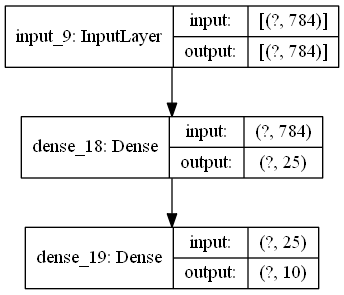

In [11]:
# your answer here

# answer
ourInputs = keras.Input(shape=(784,))

x = layers.Dense(25, activation="sigmoid")(ourInputs)
ourOutputs = layers.Dense(10, activation="sigmoid")(x)
ourModel = keras.Model(inputs=ourInputs, outputs=ourOutputs, name="mnist_model")

ourModel.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = ourModel.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = ourModel.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
keras.utils.plot_model(ourModel, "lastWeekModel.png", show_shapes=True)

## What you should see

For one layer and about 80 neurons less you lose 5 percentage points of accuracy. Our simple network is still not too bad. 

## Using the softmax function and ReLUs

Until now, we've been allowing the outputs of our network to sum up to more than one. That's fine for predictions, since we just pick the node with the highest activation and take that as our predicted class. Still, it might be nice, at least for interpretability, if we compress the sum of all these outputs to 1. Then we can interpret each output as a probability of being that class.

What's more, sigmoid neurons have some problems, and Rectified Linear Units (linear, except for negative values which become 0) have been shown to work very well in deep neural networks. Note that they are nonlinear for data < 0, and otherwise linear. That's why they still count as nonlinear activation functions. See [this](https://stats.stackexchange.com/a/510818) or [this](https://www.youtube.com/watch?v=68BZ5f7P94E) for more info (**optional**).

Over to you: use the same network you just trained, only switch to ReLUs and use a softmax output layer! Also, train for 4 instead of 2 epochs (4 full passes over the training data)

Epoch 1/4
750/750 [==============================] - 1s 2ms/step - loss: 1.7037 - accuracy: 0.7952 - val_loss: 1.5646 - val_accuracy: 0.9162
Epoch 2/4
750/750 [==============================] - 1s 2ms/step - loss: 1.5586 - accuracy: 0.9161 - val_loss: 1.5430 - val_accuracy: 0.9276
Epoch 3/4
750/750 [==============================] - 1s 2ms/step - loss: 1.5428 - accuracy: 0.9269 - val_loss: 1.5338 - val_accuracy: 0.9357
Epoch 4/4
750/750 [==============================] - 1s 2ms/step - loss: 1.5337 - accuracy: 0.9351 - val_loss: 1.5300 - val_accuracy: 0.9373
313/313 - 0s - loss: 1.5318 - accuracy: 0.9353
Test loss: 1.5317727327346802
Test accuracy: 0.9352999925613403


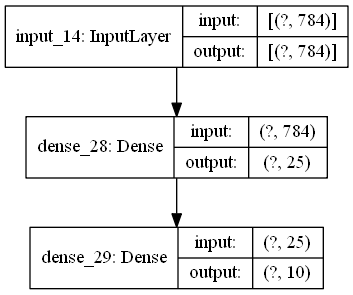

In [16]:
# your answer here

# answer
ourInputs = keras.Input(shape=(784,))

x = layers.Dense(25, activation="relu")(ourInputs)
ourOutputs = layers.Dense(10, activation="softmax")(x)
ourModel = keras.Model(inputs=ourInputs, outputs=ourOutputs, name="mnist_model")

ourModel.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = ourModel.fit(x_train, y_train, batch_size=64, epochs=4, validation_split=0.2)

test_scores = ourModel.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
keras.utils.plot_model(ourModel, "lastWeekModel.png", show_shapes=True)

## What you see

If all goes well, you should see you get a slightly better outcome in this way. This is only due to the ReLUs and/or a different initialisation. I ran it 3 times, and got a worse performance once and a better performance twice. Remember, neural networks get random initialisations to break the symmetry that otherwise occurs in the errors of neurons (causing everything to update the exact same way).

## Training a convolutional neural network
Using Keras we are not beholden to simple dense networks. We can quite easily train a convolutional neural network. Let's do that now and see its performance. Go [here](https://keras.io/examples/vision/mnist_convnet/) and follow the instructions. **Make sure you understand what each layer does, so quickly look up Dropout and Flatten to see what they might do!**. Note that this tutorial doesn't use the functional API but the `Sequential()` syntax. It leads to the same thing, and it is good for you to see that these two different ways of defining Keras models exist!

**Beware: training this network for 15 epochs takes quite some time. Reduce it to 8 epochs instead of the 15 in the example for speed**

In [17]:
# your answer here


#answer
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


modelConv = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

modelConv.summary()

batch_size = 128
epochs = 15 #change to something like 5 or 7 for speed in your code!

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelConv.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = modelConv.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________

## What you should see

You should see that there is indeed an accuracy of ~99% on the test set. For fewer epochs it might be more ~98%, but still. _Pretty nifty_ for a few lines of code. 

Do note that, if you were to run this code on real handwritten digits, you still need to solve the problem of segmenting out the digits in an image. Also note that in this dataset all the ones look like | and not so much like 1. So a 1 might register as a 7. The point is that this classifier works fine for the narrow task you gave it, so it will perform nigh-on perfectly on classifying MNIST digits, but add a little noise or a small difference, and there's still a problem. It generalises well to the _specific_ problem of MNIST data, but certainly not _as well_ to the actual problem of digit recognition. It is still just a toy classifier. See [here](https://matteo-a-barbieri.medium.com/why-mnist-is-the-worst-thing-that-has-ever-happened-to-humanity-49fd053f0f66) for more info.

## Finally: integrating neural networks with scikit-learn for (nested) cross-validation

What we _want_ to do is to be able to take a neural network and use the tools you have learned for cross-validation to improve it. Ideally, you'd use a scikit-learn Pipeline with a StandardScaler, and then perhaps a dimension reduction step if necessary, and then a neural network, all with tunable hyperparameters, which could all be tuned at once with the pipeline and GridSearchCV or RandomSearchCV. 

Luckily, this is possible. We just need to do two things:
1. Make a _function_ that constructs a Keras neural network model, that takes arguments which are parameters we might want to change. Say, the learning rate, size of Hidden Layer 1, and size of Hidden Layer 2. 
2. Instantiate a scikit-learn model object built from our neural network, using `KerasClassifier`

This is not too difficult. An example of building such a function and instantiating a model is shown below. Make sure you understand the steps: making a model-building function in Keras, wrapping that function in a call that lets it behave as a scikit-learn classifier, and then hyperparameter tuning as normal (here without nested cross-val for speed).

**Note: RandomisedSearchCV depends on random numbers, so your outcome will be slightly different.**

In [9]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV #rather than trying all combinations of hyperparams, sample some options from a range

randomNumberMaker = np.random.default_rng(seed=42)

#I am just reloading the train data so it's all unaltered.

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#subsample
indicesTrain = randomNumberMaker.integers(0, len(x_train), 3000)
indicesTest = randomNumberMaker.integers(0, len(x_test), 200)
x_train = x_train[indicesTrain]
y_train = y_train[indicesTrain]
x_test  = x_test[indicesTest]
y_test  = y_test[indicesTest]
print(x_train.shape[0], "train samples after downsampling for faster runtime")
print(x_test.shape[0], "test samples after downsampling for faster runtime")

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

#function to build our model
def build_neural_net(hiddenLayerOne=784, hiddenLayerTwo=256, learnRate=0.01):
    # initialize a sequential model and add layer to flatten the input data
    model = Sequential()
    #Flatten turns 28*28 image into 1 by 784 (just 784 pixel values)
    model.add(Flatten()) 
    model.add(Dense(hiddenLayerOne, activation="relu",
        input_shape=(784,)))
    #note that the dropout rate here could also be a hyperparameter!
    model.add(Dropout(0.3))
    model.add(Dense(hiddenLayerTwo, activation="relu"))
    model.add(Dropout(0.3))
    # add a softmax layer on top
    model.add(Dense(10, activation="softmax"))
    # compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learnRate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    # return compiled model
    return model

model = KerasClassifier(build_fn=build_neural_net, verbose=0)
from sklearn.model_selection import RandomizedSearchCV

#let's define some parameters to search over
hiddenLayerOne = [5, 10, 50]
hiddenLayerTwo = [5, 10, 50]
learnRate = [1e-2, 1e-3]
batchSize = [4, 8, 16]
epochs = [4, 8, 16, 32]

# create a dictionary, this is what sklearn wants

# note that batch_size and epochs are not arguments of
# our model construction function, but they are
# normally arguments of model.fit() in Keras,
# see what you did at the top of the notebook.

# The names on the left here NEED to match the argument names
# of your build_neural_net function.
grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    hiddenLayerTwo=hiddenLayerTwo,
    learnRate=learnRate,
    batch_size=batchSize,
    epochs=epochs
)

#-1 = use all CPUs, cv--> 3-fold cross-val.
search = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=3,
    param_distributions=grid, scoring="accuracy", n_iter = 5)
searchResults = search.fit(x_train, y_train)
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("Best score is {:.2f} using {}".format(bestScore,
    bestParams))

#finally, use best model on train data on test data (normally would use nested cross-validation)

bestModel = searchResults.best_estimator_
accuracy = bestModel.score(x_test, y_test)
print("accuracy: {:.2f}%".format(accuracy * 100))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
3000 train samples after downsampling for faster runtime
200 test samples after downsampling for faster runtime
Best score is 0.89 using {'learnRate': 0.001, 'hiddenLayerTwo': 5, 'hiddenLayerOne': 50, 'epochs': 32, 'batch_size': 16}
accuracy: 92.00%


## What I want you to remember here

There is of course a lot more nuance and power in Keras, this is just the tip of the iceberg. But the practical skills you need to take from here:
* You know how to build and train a neural network model using Keras (both Dense and Convolutional models).
* You know how to wrap a Keras model in a constructor function, and instantiate it as a sklearn model, so that you can use it with sklearn for hyperparameter optimalisation

## The end

With that, the course content is done. All that's left is to apply ML to an example dataset using your understanding of the fundamentals of what's _really_ going on, and the high-level high-powered libraries that you can now command. 

## Survey
[Click me, click me. Oh, oh, oh click me!](https://docs.google.com/forms/d/e/1FAIpQLScURtN2iRNJrLGHqYLxOOZ8Fz8xjoqsIcC_lGzfwuukRvZ0Ew/viewform?usp=sf_link) - after Donkey (on the Shrek DVD main menu)